# Esercizi 01

## 01.1 - Test generatore di numeri casuali uniformi

Un primo test per il generatore di numeri casuali consiste nella valutazione del valor medio dei numeri estratti uniformemente in $[0,1)$. Per tale distribuzione il valore di aspettazione è
$$\langle r \rangle = \int_0^1 r dr=\frac{1}{2}$$

Per il calcolo del valor medio e della sua incertezza sono stati utilizzati $M=10000$ numeri estratti uniformemente tra $0$ e $1$, suddivisi in $100$ blocchi.

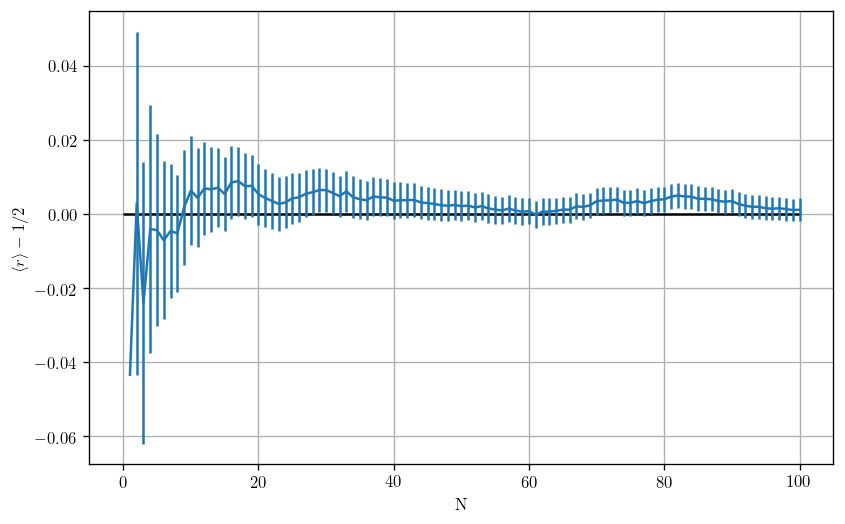

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

n,avg,err=np.loadtxt("Ex_01_1/out_01_1a.txt", delimiter=",", skiprows=1, usecols=(0,1,2), dtype="int,float,float", unpack=True)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(8,5),dpi=120)
plt.hlines(0,0,100)
plt.errorbar(n,avg-0.5,yerr=err)
plt.grid()
plt.xlabel("N")
plt.ylabel(r"$\langle r \rangle-1/2$")
plt.show()

Nel grafico sono riportati i valori medi $\langle r \rangle$ in funzione del numero dei blocchi considerati. I valori sull'asse delle ordinate sono stati traslati di $-\frac{1}{2}$ in modo che la convergenza sia a $0$ invece che al valore atteso $\frac{1}{2}$. Il valor medio dei numeri estratti dal generatore è effettivamente $\frac{1}{2}$.

Per la stima della varianza, il valore atteso è 
$$\sigma^2=\int_0^1 \left(r-\langle r \rangle \right)^2dr=\int_0^1 \left(r-\frac{1}{2}\right)^2dr=\frac{1}{12}$$
Per calcolare la varianza dei numeri casuali estratti dal nostro generatore, avendo prima appurato che il valor medio è $\frac{1}{2}$, dobbiamo calcolare $$\langle \left(r-\frac{1}{2}\right)^2 \rangle$$

Anche in questo caso ho considerato $M=10000$ estrazioni divise in $100$ blocchi. In questo caso l'incertezza stimata corrisponde all'incertezza sull'incertezza. 

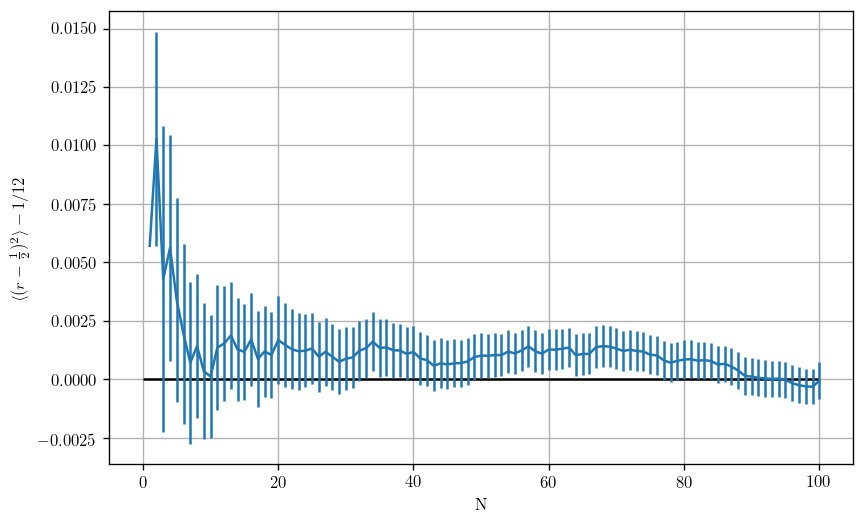

In [3]:
n,avg,err=np.loadtxt("Ex_01_1/out_01_1b.txt", delimiter=",", skiprows=1, usecols=(0,1,2), dtype="int,float,float", unpack=True)

plt.figure(figsize=(8,5),dpi=120)
plt.hlines(0,0,100)
plt.errorbar(n,avg-1/12,yerr=err)
plt.grid()
plt.xlabel("N")
plt.ylabel(r'$\langle (r -\frac{1}{2})^2 \rangle - 1/12$')
plt.show()

Anche in questo caso, traslando il valor medio calcolato di $\frac{1}{12}$ si osserva la convergenza al valore atteso. La varianza dei numeri estratti dal generatore è effettivamente $\frac{1}{12}$.

Rimane ora da verificare che effettivamente i numeri estratti siano uniformi. Vogliamo quindi escludere l'ipotesi che la distribuzione da cui questi numeri sono estratti **non** sia uniforme. Inoltre vogliamo escludere ciò per diversi intervalli di numeri estratti, ovvero la distribuzione deve essere uniforme (vogliamo escludere che **non** sia uniforme) non solo considerando, ad esempio, i primi $10000$ numeri estratti, ma anche considerando i successivi $10000$ e così via.


Per fare questo utilizziamo il test $\chi^2$: se il numero atteso di eventi è $E_i$ mentre quello osservato effettivamente è $O_i$, il chi-quadro è 
$$\chi^2=\sum_i \frac{(O_i-E_i)^2}{E_i}$$
dove al denominatore si considera la varianza $\sigma^2=E_i$, che deriva dalla statistica di conteggio.

Per implementare il test $\chi^2$ abbiamo diviso l'intervallo $[0,1]$ in $M=100$ sotto-intervalli identici. Il numero atteso di eventi (ovvero che l'estrazione di un numero casuale uniforme si trovi nell'i-esimo sotto intervallo) dopo $n$ estrazioni è $\frac{n}{M}\equiv E_i$ ed è ovviamente uguale per tutti i sotto-intervalli. Il numero di eventi osservati $n_i\equiv O_i$ corrisponde invece al numero di numeri effettivamente estratti nell'intervallo i-esimo. Ci si attendo per $\chi^2$ un valore pari a circa $\frac{n}{M}$: valori più alti (corrispondenti quindi a scarti quadratici maggiori tra numero di eventi osservati e attesi) potrebbero indicare che la distribuzione non è uniforme. È stato calcolato $\chi^2$ per $100$ volte utilizzando blocchi di $10000$ numeri casuali successivi. Nel grafico sottostante $j$ indica a quale blocco di $10000$ numeri casuali corrisponde il valore di $\chi^2$ rappresentato.

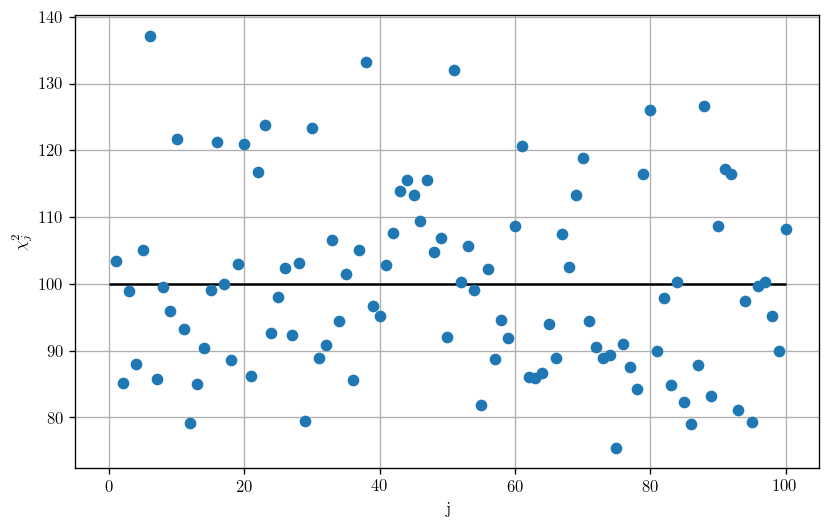

In [4]:
j,chi=np.loadtxt("Ex_01_1/out_01_1c.txt", delimiter=",", skiprows=1, usecols=(0,1), dtype="int,float", unpack=True)

plt.figure(figsize=(8,5),dpi=120)
plt.hlines(100,0,100)
plt.plot(j,chi,"o")
plt.grid()
plt.xlabel(r'j')
plt.ylabel(r'$\chi^2_j$')
plt.show()

I dati più lontani dal valore atteso $100$ sono intorno a $\chi \approx 140$. Considerando $d=99$ gradi di libertà si ha $p(\chi^2 > 140)<0.005$ e non possiamo quindi rigettare l'ipotesi che la distribuzione **non** sia uniforme anche in quegli intervalli?????

## 01.2 - Teorema del limite centrale

Per verificare il teorema del limite centrale si sono considerate tre distribuzioni di probabilità:
1. Dado a sei facce (distribuzione di probabilità discreta)
2. Dado esponeniale (distribuzione esponenziale, $\lambda=1$)
3. Dado lorentziano (distribuzione di Cauchy-Lorentz $\mu=0$, $\Gamma=1$)

Per ognuna di queste distribuzioni di probabilità si è considerata la convergenza al rispettivo bacino attrattore della variabile aleatoria $$S_N=\frac{1}{N}\sum_{i=1}^N x_i$$ dove $x_i$ è una variabile aleatoria con una delle distribuzioni di probabilità sopra elencate.

### Dado a sei facce

I sei possibili esiti del lancio di un dado sono $1,2,3,4,5,6$ e sono tutti equiprobabili con $p=\frac{1}{6}$. Il valor medio è $\langle x_i \rangle = 3.5$, mentre la varianza è $\sigma^2_{x_i}=\frac{105}{36}\approx 2.92 $ ovvero $\sigma_{x_i}\approx 1.71$. Ci si attende quindi che la distribuzione di probabilità di $S_N$ converga a una gaussiana con $\mu=\langle x_i \rangle = 3.5$ e varianza $\sigma^2=\frac{\sigma^2_{x_i}}{N}$, ovvero $\sigma=\frac{\sigma_{x_i}}{\sqrt{N}}$.

Optimized parameters [mu,sigma] =
[3.50109644 0.16874924]
Parameters uncertainty =
[0.00064705 0.00052832]


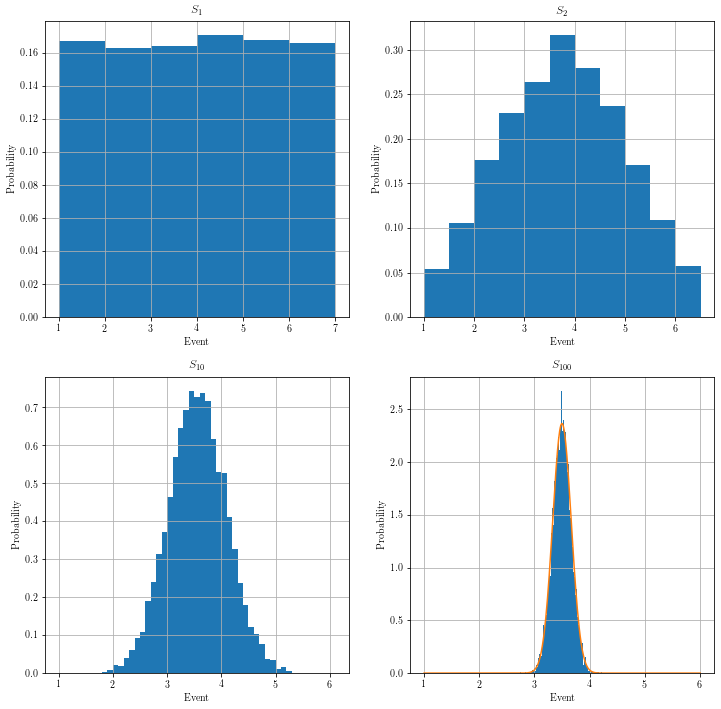

In [5]:
from scipy.optimize import curve_fit

s_1=np.loadtxt("Ex_01_2/out_std_S1.txt", skiprows=1)
s_2=np.loadtxt("Ex_01_2/out_std_S2.txt", skiprows=1)
s_10=np.loadtxt("Ex_01_2/out_std_S10.txt", skiprows=1)
s_100=np.loadtxt("Ex_01_2/out_std_S100.txt", skiprows=1)


fig, ax = plt.subplots(2, 2, figsize=(12,12))
ax[0,0].hist(s_1, 6, range=(1,7),density=True)
ax[0,0].set_title(r"$S_1$")
ax[0,1].hist(s_2, 11, range=(1,6.5),density=True)
ax[0,1].set_title(r"$S_2$")
ax[1,0].hist(s_10, 51, range=(1,6.1),density=True)
ax[1,0].set_title(r"$S_{10}$")
n,bins,patches=ax[1,1].hist(s_100, 500, range=(1,6.01),density=True)
ax[1,1].set_title(r"$S_{100}$")

for i in range(2):
    for j in range(2):
        ax[i,j].set_xlabel("Event")
        ax[i,j].set_ylabel("Probability")
        ax[i,j].grid(True)
    
def gauss(x,mu,sigma):
    return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))

#Per fare il fit considero il punto centrale dei canali
#L'array bins contiene anche l'edge a destra dell'ultimo canale
bins_width=bins[1]-bins[0]
bins_centred=[bins[i]+0.5*bins_width for i in range(len(bins)-1)]

p_opt, p_cov = curve_fit(gauss, bins_centred, n, bounds=([0,0],[6,6]))
ax[1,1].plot(bins_centred,gauss(bins_centred,p_opt[0],p_opt[1]))

print("Optimized parameters [mu,sigma] =")
print(p_opt)
print("Parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))
    
plt.show()

La distribuzione di probabilità di $S_N$ converge effettivamente a una gaussiana. Inoltre, effettuando un fit gaussiano per l'istogramma corrispondente a $S_{100}$ si ottengono dei valori di $\mu_{fit}$ e $\sigma_{fit}$ compatibili con quelli attesi sfruttando il teorema del limite centrale.

### Dado esponenziale

La distribuzione esponenziale $$p(x)=\lambda e^{-\lambda x}$$ ha valore di aspettazione $\langle x_i \rangle=\frac{1}{\lambda}$ e varianza $\sigma^2_{x_i}=\frac{1}{\lambda^2}$. La distribuzione limite $S_N$ dovrebbe quindi convergere a una gaussiana con $\mu=\langle x_i \rangle =\frac{1}{\lambda}$ e varianza $\sigma^2 = \frac{1}{\lambda^2 N}$, quindi $\sigma=\frac{1}{\lambda \sqrt{N}}$. Se $\lambda=1$ ci si attende quindi, per $S_{_100}$, $\mu\approx1$ e $\sigma\approx0.01$.

Optimized parameters [mu,sigma] =
[0.99201909 0.09944999]
Parameters uncertainty =
[0.00097159 0.00079334]


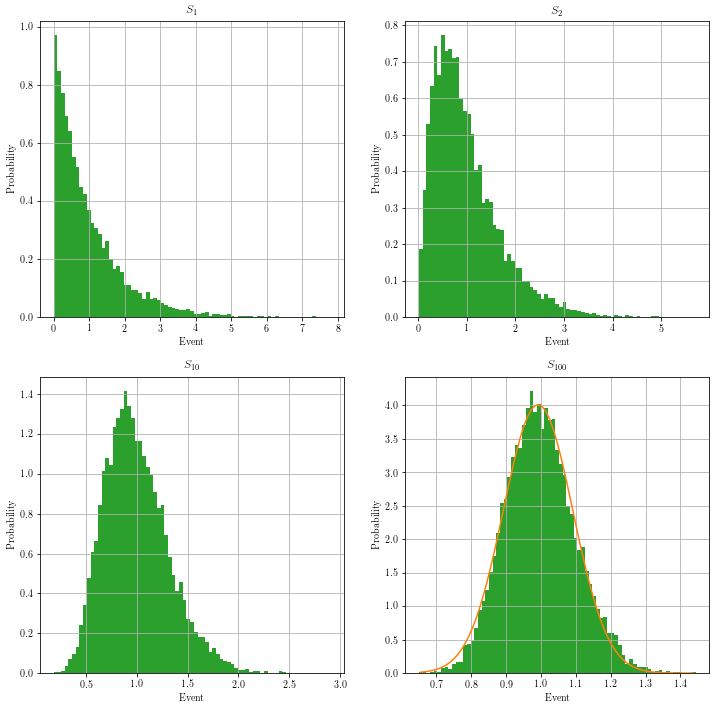

In [11]:
s_1=np.loadtxt("Ex_01_2/out_exp_S1.txt", skiprows=1)
s_2=np.loadtxt("Ex_01_2/out_exp_S2.txt", skiprows=1)
s_10=np.loadtxt("Ex_01_2/out_exp_S10.txt", skiprows=1)
s_100=np.loadtxt("Ex_01_2/out_exp_S100.txt", skiprows=1)



fig, ax = plt.subplots(2, 2, figsize=(12,12))
ax[0,0].hist(s_1, 75,density=True, color="C2")
ax[0,0].set_title(r"$S_1$")
ax[0,1].hist(s_2, 75,density=True, color="C2")
ax[0,1].set_title(r"$S_2$")
ax[1,0].hist(s_10, 75,density=True, color="C2")
ax[1,0].set_title(r"$S_{10}$")
n,bins,patches=ax[1,1].hist(s_100, 75,density=True,align="mid", color="C2")
ax[1,1].set_title(r"$S_{100}$")

for i in range(2):
    for j in range(2):
        ax[i,j].set_xlabel("Event")
        ax[i,j].set_ylabel("Probability")
        ax[i,j].grid(True)
        
def gauss(x,mu,sigma):
    return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))


#Per fare il fit considero il punto centrale dei canali
#L'array bins contiene anche l'edge a destra dell'ultimo canale
bins_width=bins[1]-bins[0]
bins_centred=[bins[i]+0.5*bins_width for i in range(len(bins)-1)]

p_opt, p_cov = curve_fit(gauss, bins_centred, n, bounds=([0,0],[6,6]))
ax[1,1].plot(bins_centred,gauss(bins_centred,p_opt[0],p_opt[1]), color="C1")

print("Optimized parameters [mu,sigma] =")
print(p_opt)
print("Parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))        
            
    
plt.show()

La distribuzione di probabilità di $S_N$ converge effettivamente a una gaussiana. Inoltre, effettuando un fit gaussiano per l'istogramma corrispondente a $S_{100}$ si ottengono dei valori di $\mu_{fit}$ e $\sigma_{fit}$ compatibili con quelli attesi sfruttando il teorema del limite centrale.

### Dado di Cauchy

La distribuzione di Cauchy-Lorentz
$$p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$$
ha varianza infinita. Pertanto *non* ci si attende che converga a una gaussiana. La distribuzione limite per $S_N$, in questo caso, è esattamente la distribuzione iniziale. In questo caso si è considerato $\mu=0$ e $\Gamma=1$.

Optimized parameters [mu,gamma] =
[-0.00703855  0.97953321]
Parameters uncertainty =
[0.00560821 0.00555303]


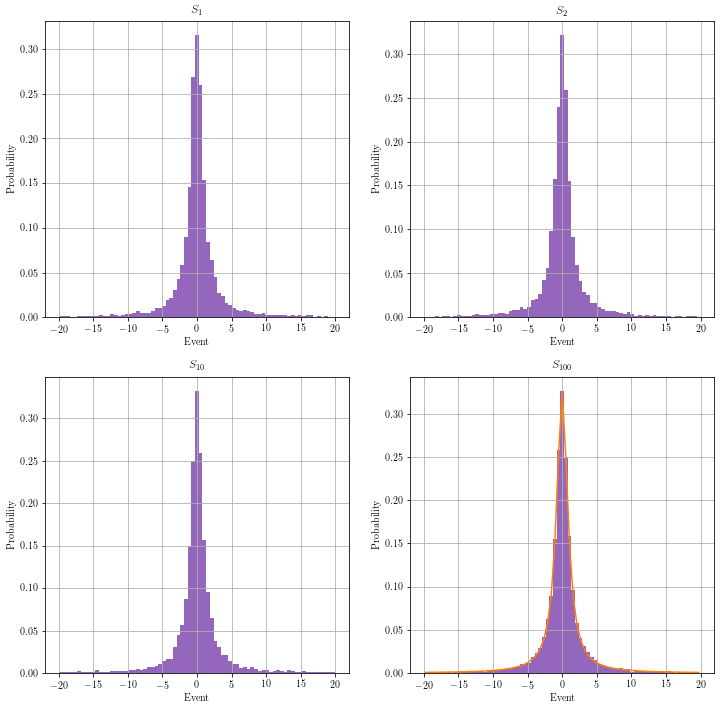

In [15]:
s_1=np.loadtxt("Ex_01_2/out_cauchy_S1.txt", skiprows=1)
s_2=np.loadtxt("Ex_01_2/out_cauchy_S2.txt", skiprows=1)
s_10=np.loadtxt("Ex_01_2/out_cauchy_S10.txt", skiprows=1)
s_100=np.loadtxt("Ex_01_2/out_cauchy_S100.txt", skiprows=1)



fig, ax = plt.subplots(2, 2, figsize=(12,12))
ax[0,0].hist(s_1, 75, range=(-20,20),density=True, color="C4")
ax[0,0].set_title(r"$S_1$")
ax[0,1].hist(s_2, 75, range=(-20,20),density=True, color="C4")
ax[0,1].set_title(r"$S_2$")
ax[1,0].hist(s_10, 75, range=(-20,20),density=True, color="C4")
ax[1,0].set_title(r"$S_{10}$")
n,bins,patches=ax[1,1].hist(s_100, 75, range=(-20,20),density=True, color="C4")
ax[1,1].set_title(r"$S_{100}$")

for i in range(2):
    for j in range(2):
        ax[i,j].set_xlabel("Event")
        ax[i,j].set_ylabel("Probability")
        ax[i,j].grid(True)
    
def cauchy(x,mu,gamma):
    return 1/np.pi*gamma/((x-mu)**2+gamma**2)

#Per fare il fit considero il punto centrale dei canali
#L'array bins contiene anche l'edge a destra dell'ultimo canale
bins_width=bins[1]-bins[0]
bins_centred=[bins[i]+0.5*bins_width for i in range(len(bins)-1)]

p_opt, p_cov = curve_fit(cauchy, bins_centred, n, bounds=([-5,0],[5,5]))
ax[1,1].plot(bins_centred,cauchy(bins_centred,p_opt[0],p_opt[1]),color="C1")

print("Optimized parameters [mu,gamma] =")
print(p_opt)
print("Parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))   

plt.show()

Come si può vedere, non ci sono significative differenze al variare di $N$. Nel caso di $S_{100}$, i parametri della distribuzione di Cauchy-Lorentz fittata sono compatibili con quelli iniziali. 

# 01.3 - Esperimento di Buffon
Per descrivere il lancio di un ago bisogna individuarne un'estremità (la cruna, ad esempio), che fissa il centro di una circonferenza, e la direzione in cui esso punta.
* Per individuare il centro, ai nostri fini, è sufficiente una sola coordinata (il problema è invariante per traslazioni lungo la direzione delle righe del pavimento). Chiamo questa coordinata $c$, dovrà essere estratta uniformemente tra $0$ e $d$, la distanza tra le righe del pavimento.
* Per individuare la direzione bisognerebbe estrarre casualmente un angolo tra $-\pi$ e $\pi$ in modo uniforme, ma in questo modo useremmo $\pi$ per calcolare $\pi$. Per evitare di utilizzare $\pi$, continuando a mantenere la direzione dell'ago distribuita uniformemente, un'idea è quella di estrarre *in modo appropriato* un punto $(x,y) \in \mathbb{R}^2$ e ricavarne l'angolo delle coordinate polari. Per fare questo si può utilizzare la funzione Arcotangente2, che si può implementare senza utilizzare $\pi$, infatti: $$\theta=2\arctan{\frac{y}{\sqrt{x^2+y^2}+x}}$$ 
   1. Si potrebbero estrarre due numeri casuali $(x,y)\in \mathbb{R}^2$ gaussianamente e da questo punto ricavare l'angolo corrispondente in coordinate polari. Infatti, la distribuzione di probabilità congiunta è $p(x,y)=p(x)p(y)=\frac{1}{2\pi \sigma^4}e^{-\frac{x^2+y^2}{2\sigma^2}}$, ovvero dipende dal modulo del vettore $(x,y)$, ma non dall'angolo. In realtà per l'estrazione di numeri gaussiani si utilizza $\pi$, quindi questo metodo non mi sembra del tutto lecito.
   2. Un'alternativa più "onesta" consiste nell'estrarre le componenti del vettore (x,y) uniformemente in $[-1,1)$ e poi scartare i punti che giacciono al di fuori del cerchio unitario, che quindi risulta riempito uniformemente. Questo è il metodo seguito per fare l'esperimento. La probabilità che un punto cada all'interno del cerchio unitario è $\frac{\pi}{4}\approx0.8$, quindi rigetto circa il $20 \%$ dei punti. 
   
Una volta stabilito il modo di "lanciare" l'ago, diciamo che l'ago ha "colpito" la riga del pavimento se $c+L\cos{\theta}>d$ o $c+L\cos{\theta}<0$, ovvero se la punta dell'ago si trova prima o dopo le righe (dal momento che la cruna è stata estratta tra le righe).

<img src="buffon.png" width="400">

Ho effettuato $M=10^5$ lanci, suddivisi in $N=100$ blocchi. Ho scelto come distanza tra le righe $d=1$ e come lunghezza dell'ago $L=0.8$.

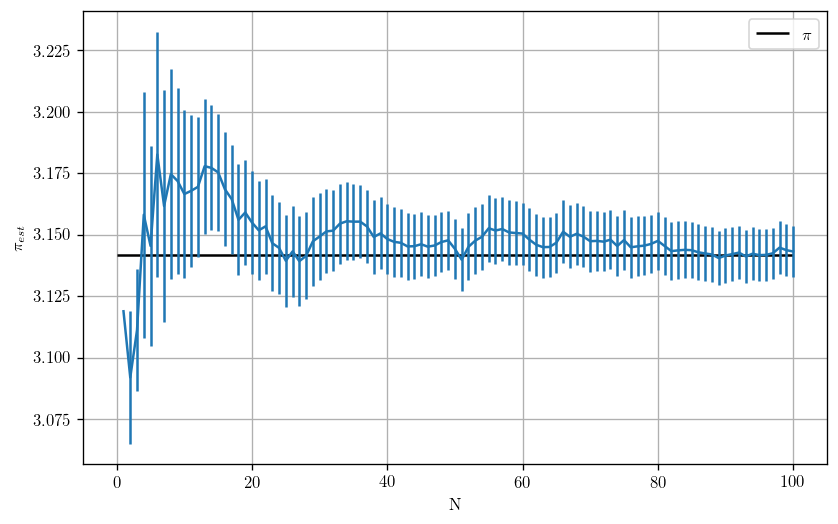

In [8]:
n,avg,err=np.loadtxt("Ex_01_3/out_01_3.txt", delimiter=",", skiprows=1, usecols=(0,1,2), dtype="int,float,float", unpack=True)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(8,5),dpi=120)
plt.hlines(np.pi,0,100,label="$\pi$")
plt.errorbar(n,avg,yerr=err)
plt.grid()
plt.xlabel("N")
plt.ylabel(r"$\pi_{est}$")
plt.legend()
plt.show()

Nel grafico è rappresentato l'andamento del valore di $\pi$ stimato in funzione del numero di blocchi considerati, dove ogni blocco corrisponderebbe al lancio di $1000$ aghi. Il risultato risulta compatibile con il valore di $\pi$.